# "The effect of model resolution on air-sea CO$_{2}$ equilibration timescales "
## Code for Figure 1 Map of mCDR Sites
Corresponding to Yinghuan Xie (yinghuan.xie@utas.edu.au)

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [2]:
# Assign lat-lon region box
######## Range: -90 - 90
lat_min   = {'02':-29,'03':17,'04': -7.5, '05': 58,'06':-75,'07':-33,'08':10,'09':-50,'10':-25,'11':12.5,'12':-75,'13':-75, '16':-45,'17':35,'18':33, '21': 30}
lat_max   = {'02':-24,'03':22,'04':  0, '05': 65,'06':-70,'07':-26,'08':15,'09':-40,'10':-20,'11':17.5,'12':-70,'13':-65, '16':-40,'17':40,'18':39, '21': 35}
######## Range -280 - 80
lon_min   =  {'02':151-360,'03':-158,'04':-40, '05':-22.5,'06':-180,'07':111-360,'08':112.5-360,'09':-77.5,'10':-49,'11':70,'12':-50,'13':65, '16':143-360,'17':140.5-360,'18':-11, '21': -82 }
lon_max   =  {'02':157-360,'03':-153,'04': -35, '05': -17,'06':-165,'07':117-360,'08':117.5-360,'09':-70,'10':-38,'11':77.5,'12':-35,'13':79.9, '16':150-360,'17':145.5-360,'18':-6, '21': -75}
###
exp_hemi =  {'02':'S','03':'N','04':  'S', '05': 'N','06':'S','07':'S','08':'N','09':'S','10':'S','11':'N','12':'S','13':'S', '16':'S','17':'N','18':'N', '21': 'N'}
###

site_color_old = {'Iceland':'b','Ross Sea':'royalblue','Weddell Sea':'deepskyblue','Eastern Antarctica':'lightskyblue',
              'Kuroshio Current':'g','Gulf Stream':'limegreen',
              'Western Australia':'brown','Tasmania':'orange','West of Gibraltar':'gold',
              'Hawaii':'m','Amazon':'lightcoral','South China Sea':'r'}
site_color = {'Iceland':'b','Ross Sea':'royalblue','Weddell Sea':'deepskyblue','Eastern Antarctica':'lightskyblue',
              'Kuroshio Current':'g','Gulf Stream':'limegreen',
              'Western Australia':'gold','Tasmania':'orange','West of Gibraltar':'goldenrod',
              'Hawaii':'orangered','Amazon':'crimson','South China Sea':'red'}

exp_name =  {'02':'Eastern Australia','03':'Hawaii','04':  'Amazon', '05': 'Iceland','06':'Ross Sea','07':'Western Australia','08':'South China Sea','09':'Chile','10':'Brazil','11':'Eastern India','12':'Weddell Sea','13':'Eastern Antarctica', '16':'Tasmania','17':'Kuroshio Current','18':'West of Gibraltar','21':'Gulf Stream'}


In [5]:
# Manually assign working directory
local_dir = '/g/data/gv90/yx9454/Air-sea_CO2_equilibration_timescales_upload_files'
main_directory = f'{local_dir}/Analysis_&_result'

grid010 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_01.nc')


# Use the existing 2D latitude and longitude array
geolon_t = grid010.geolon_t
geolat_t = grid010.geolat_t
station_map = np.full(geolon_t.shape, np.nan)

for station_id, lat_min_val in lat_min.items():
    lat_max_val = lat_max[station_id]
    lon_min_val = lon_min[station_id]
    lon_max_val = lon_max[station_id]
    mask = (geolon_t >= lon_min_val) & (geolon_t <= lon_max_val) & (geolat_t >= lat_min_val) & (geolat_t <= lat_max_val)
    station_map[mask] = int(station_id)

ocean_mask = grid010.depth_t>0
station_map[~ocean_mask]=np.nan

Site No 03
done
Site No 04
done
Site No 05
done
Site No 06
done
Site No 07
done
Site No 08
done
Site No 12
done
Site No 13
done
Site No 16
done
Site No 17
done
Site No 18
done
Site No 21
done


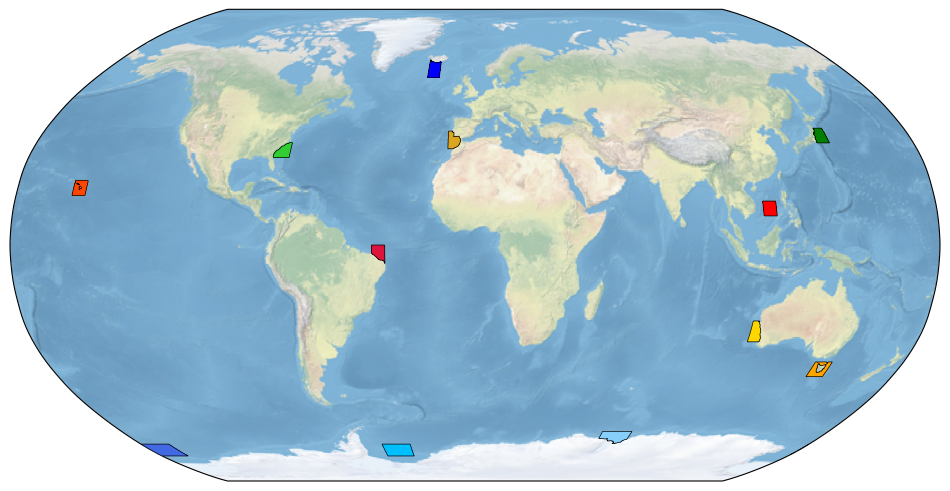

In [6]:
# Create a map using Robinson projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())

ax.stock_img()

for station_id, site_name in exp_name.items():
    if station_id in ['04', '07', '12', '05', '16', '17', '06', '08', '18', '03', '13', '21']:
        print('Site No',station_id)
        color = site_color.get(site_name, 'gray')
        
        tar = np.copy(station_map)
        tar[tar!=int(station_id)]=np.nan
        # Use contourf to draw fill contours, specifying a single color
        contour_filled = ax.contourf(grid010.geolon_t, grid010.geolat_t, tar, 
                                     transform=ccrs.PlateCarree(), levels=[0, 100], 
                                     colors=[color], zorder=10)
        
        # Use contour to draw the edge, specifying the color and line width of the edge
        tar[np.isnan(tar)]=0
        contour_edges = ax.contour(grid010.geolon_t, grid010.geolat_t, tar, 
                                   transform=ccrs.PlateCarree(), levels=[-1,0, 100], 
                                   colors='black', linewidths=0.5, zorder=11)
        print('done')

#plt.savefig('/g/data/jk72/yx9454/PhD_Ch2/Analysis_&_result/Main_Fig/Fig_1_site_map_No_coastline.png', dpi=500)
plt.show()
